In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

# Evaluate the model on the test data
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


11490434/11490434 [==============================] - 3s 0us/step
Epoch 1/10
375/375 [==============================] - 47s 121ms/step - loss: 0.3580 - accuracy: 0.8910 - val_loss: 0.0879 - val_accuracy: 0.9742
Epoch 2/10
375/375 [==============================] - 43s 116ms/step - loss: 0.1145 - accuracy: 0.9658 - val_loss: 0.0595 - val_accuracy: 0.9812
Epoch 3/10
375/375 [==============================] - 40s 106ms/step - loss: 0.0828 - accuracy: 0.9750 - val_loss: 0.0477 - val_accuracy: 0.9857
Epoch 4/10
375/375 [==============================] - 47s 124ms/step - loss: 0.0661 - accuracy: 0.9810 - val_loss: 0.0413 - val_accuracy: 0.9885
Epoch 5/10
375/375 [==============================] - 47s 125ms/step - loss: 0.0547 - accuracy: 0.9837 - val_loss: 0.0436 - val_accuracy: 0.9883
Epoch 6/10
375/375 [==============================] - 46s 122ms/step - loss: 0.0504 - accuracy: 0.9844 - val_loss: 0.0393 - val_accuracy: 0.9887
Epoch 7/10
375/375 [==============================] - 40s 108ms/s

Epoch 1/10
375/375 [==============================] - 45s 116ms/step - loss: 0.3446 - accuracy: 0.8951 - val_loss: 0.0821 - val_accuracy: 0.9764
Epoch 2/10
375/375 [==============================] - 40s 107ms/step - loss: 0.1125 - accuracy: 0.9666 - val_loss: 0.0575 - val_accuracy: 0.9818
Epoch 3/10
375/375 [==============================] - 42s 111ms/step - loss: 0.0850 - accuracy: 0.9741 - val_loss: 0.0458 - val_accuracy: 0.9868
Epoch 4/10
375/375 [==============================] - 40s 107ms/step - loss: 0.0684 - accuracy: 0.9786 - val_loss: 0.0424 - val_accuracy: 0.9868
Epoch 5/10
375/375 [==============================] - 40s 106ms/step - loss: 0.0578 - accuracy: 0.9821 - val_loss: 0.0412 - val_accuracy: 0.9877
Epoch 6/10
375/375 [==============================] - 41s 110ms/step - loss: 0.0492 - accuracy: 0.9847 - val_loss: 0.0392 - val_accuracy: 0.9889
Epoch 7/10
375/375 [==============================] - 42s 112ms/step - loss: 0.0435 - accuracy: 0.9866 - val_loss: 0.0367 - val_ac

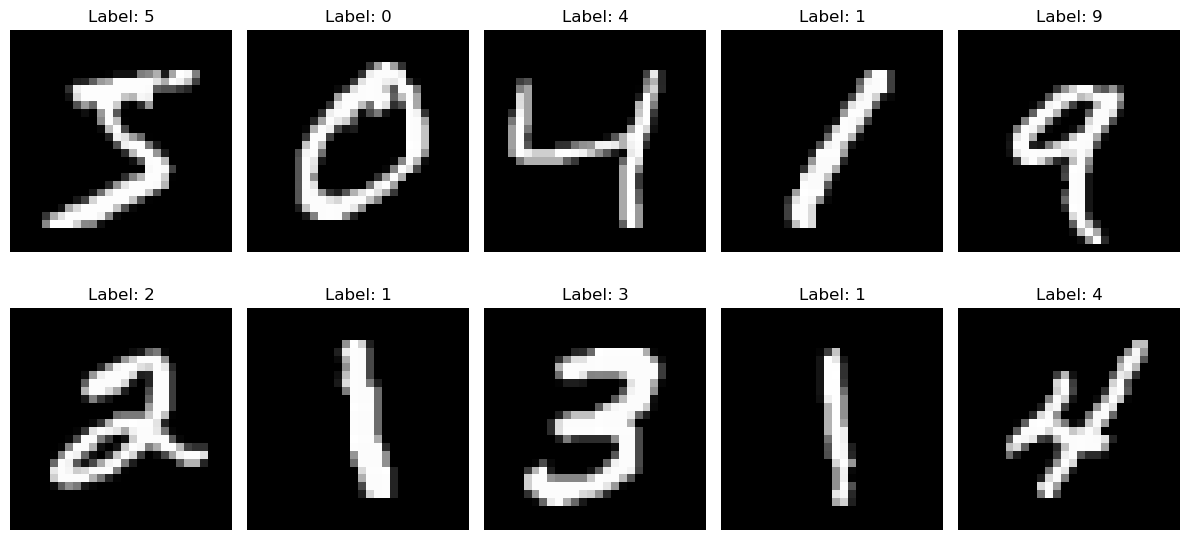

Test loss: 0.02557569369673729
Test accuracy: 0.9915000200271606

Press any key to capture an image from the camera.
Press Enter to continue...


TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

In [8]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
import cv2
import pytesseract
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Visualize some sample images from the dataset
def visualize_mnist_samples():
    num_samples = 10  # Number of samples to visualize
    plt.figure(figsize=(12, 6))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {np.argmax(y_train[i])}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

# Visualize some sample images from the MNIST dataset
visualize_mnist_samples()

# Evaluate the model on the test data
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Camera capture and number recognition code (same as before)
# ...

def capture_image():
    cap = cv2.VideoCapture(0)  # 0 represents the default camera (usually the built-in webcam)

    ret, frame = cap.read()
    if not ret:
        print("Error: Camera not found or unable to capture an image.")
        return None

    cap.release()
    return frame
def recognize_digits(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    result = pytesseract.image_to_string(gray, config='--psm 6')
    return result

def extract_numbers(text):
    numbers = ''.join(filter(str.isdigit, text))
    return numbers

print("\nPress any key to capture an image from the camera.")
input("Press Enter to continue...")
    
image = capture_image()

if image is not None:
    recognized_text = recognize_digits(image)
    print("Recognized Text:", recognized_text)

    numbers = extract_numbers(recognized_text)
    print("Extracted Numbers:", numbers)

    cv2.imshow("Original Image", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [9]:
!pip install tesseract

     ---------------------------------------- 0.0/45.6 MB ? eta -:--:--
     ---------------------------------------- 0.3/45.6 MB 8.9 MB/s eta 0:00:06
      --------------------------------------- 0.6/45.6 MB 7.5 MB/s eta 0:00:07
      --------------------------------------- 1.0/45.6 MB 7.1 MB/s eta 0:00:07
     - -------------------------------------- 1.2/45.6 MB 6.7 MB/s eta 0:00:07
     - -------------------------------------- 1.5/45.6 MB 6.7 MB/s eta 0:00:07
     - -------------------------------------- 1.8/45.6 MB 6.9 MB/s eta 0:00:07
     - -------------------------------------- 2.1/45.6 MB 7.1 MB/s eta 0:00:07
     -- ------------------------------------- 2.5/45.6 MB 7.2 MB/s eta 0:00:06
     -- ------------------------------------- 2.8/45.6 MB 7.1 MB/s eta 0:00:07
     -- ------------------------------------- 3.1/45.6 MB 7.0 MB/s eta 0:00:07
     --- ------------------------------------ 3.5/45.6 MB 7.1 MB/s eta 0:00:06
     --- ------------------------------------ 3.8/45.6 MB 7